<a href="https://colab.research.google.com/github/MPGarg/ERA1_Session13/blob/main/ERA1_S13_infer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup
This notebook requires some packages besides pytorch-lightning.

In [ ]:
! pip install --quiet "pandas" "torch" "torchvision" "ipython[notebook]" "seaborn" "pytorch-lightning" "torchmetrics" "lightning-bolts"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 21.2 MB/s eta 0:00:00


In [ ]:
!pip install --quiet "kaggle"

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"madhurgarg1","key":"551bc9a4705ccf666cd269f1a9cd122d"}'}

In [ ]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 67 Aug 16 12:32 kaggle.json
/content


In [ ]:
!kaggle datasets list

ref                                                                   title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                          Global Country Information Dataset 2023             23KB  2023-07-08 20:37:33          11838        473  1.0              
nelgiriyewithana/global-youtube-statistics-2023                       Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           3866        137  1.0              
joebeachcapital/global-earth-temperatures                             Global Earth Temperatures                           33KB  2023-08-09 06:21:51            807         29  1.0              
arnavsmayan/netflix-userbase-datase

In [ ]:
!kaggle datasets download -d aladdinpersson/pascal-voc-dataset-used-in-yolov3-video

100% 4.30G/4.31G [00:47<00:00, 101MB/s] 
100% 4.31G/4.31G [00:47<00:00, 97.3MB/s]


In [ ]:
!unzip /content/pascal-voc-dataset-used-in-yolov3-video.zip

Streaming output truncated to the last 5000 lines.
  inflating: PASCAL_VOC/labels/2009_004289.txt  
  inflating: PASCAL_VOC/labels/2009_004290.txt  
  inflating: PASCAL_VOC/labels/2009_004291.txt  
  inflating: PASCAL_VOC/labels/2009_004295.txt  
  inflating: PASCAL_VOC/labels/2009_004298.txt  
  inflating: PASCAL_VOC/labels/2009_004300.txt  
  inflating: PASCAL_VOC/labels/2009_004301.txt  
  inflating: PASCAL_VOC/labels/2009_004303.txt  
  inflating: PASCAL_VOC/labels/2009_004307.txt  
  inflating: PASCAL_VOC/labels/2009_004308.txt  
  inflating: PASCAL_VOC/labels/2009_004309.txt  
  inflating: PASCAL_VOC/labels/2009_004312.txt  
  inflating: PASCAL_VOC/labels/2009_004315.txt  
  inflating: PASCAL_VOC/labels/2009_004316.txt  
  inflating: PASCAL_VOC/labels/2009_004317.txt  
  inflating: PASCAL_VOC/labels/2009_004319.txt  
  inflating: PASCAL_VOC/labels/2009_004322.txt  
  inflating: PASCAL_VOC/labels/2009_004323.txt  
  inflating: PASCAL_VOC/labels/2009_004324.txt  
  inflating: PASCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install torch_lr_finder

In [ ]:
import os

import pandas as pd
import seaborn as sn
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from IPython.core.display import display
from pl_bolts.datamodules import CIFAR10DataModule
from pl_bolts.transforms.dataset_normalizations import cifar10_normalization
from pytorch_lightning import LightningModule, Trainer, seed_everything
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import CSVLogger
from torch.optim.lr_scheduler import OneCycleLR
from torch.optim.swa_utils import AveragedModel, update_bn
from torchmetrics.functional import accuracy
from torchvision import datasets, transforms
import torch
import torchvision
import torch.nn.functional as F
import torchvision
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
import numpy as np
from pytorch_lightning import LightningModule, Trainer, seed_everything
from torchmetrics import Accuracy
import torch.optim as optim
from pytorch_lightning import loggers as pl_loggers
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning import Trainer
import pandas as pd
from IPython.core.display import display
import seaborn as sn
import os
from loss import YoloLoss
from model import YOLOv3
from train import YOLOTraining
from dataset import YOLODataModule

PATH_DATASETS = os.environ.get("PATH_DATASETS", ".")
BATCH_SIZE = 16 if torch.cuda.is_available() else 8
NUM_WORKERS = int(os.cpu_count() / 2)

In [ ]:
from utils import get_loaders, find_max_lr
import config
from utils import *

In [ ]:
train_loader, test_loader, train_eval_loader = get_loaders(
    train_csv_path="/content/PASCAL_VOC/"+ "train.csv",
    test_csv_path="/content/PASCAL_VOC/" + "test.csv"
)

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
#model = YOLOv3(num_classes=config.NUM_CLASSES).to(DEVICE)
loss_fn = YoloLoss()
model = YOLOv3(num_classes=config.NUM_CLASSES).to(config.DEVICE)
model = YOLOTraining(loss_fn,config,model,0.001,train_loader,0.2) #10/max_epochs

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/yolo/model.pth'))

<All keys matched successfully>

In [ ]:
check_class_accuracy(model.to('cuda'), train_loader, threshold=0.05)

100%|██████████| 259/259 [09:08<00:00,  2.12s/it]

Class accuracy is: 78.290955%
No obj accuracy is: 97.919060%
Obj accuracy is: 65.142708%


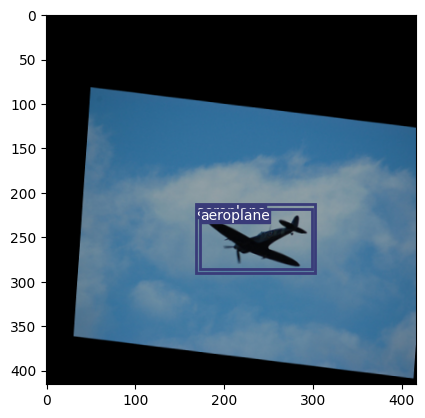

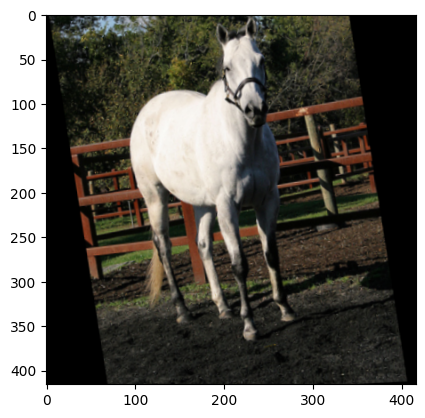

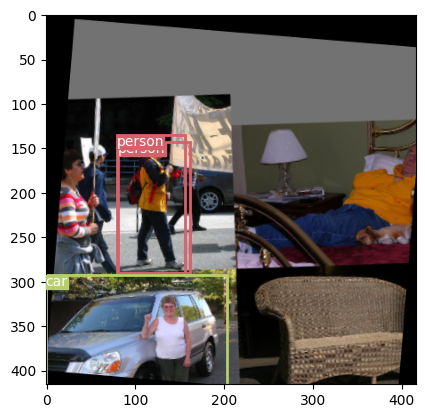

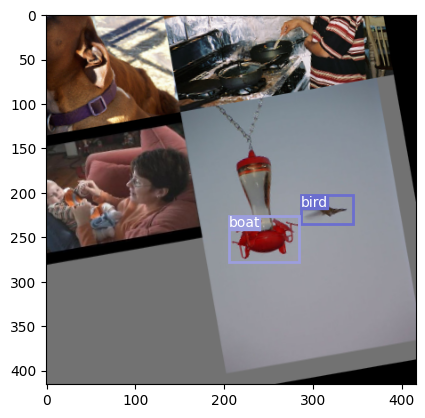

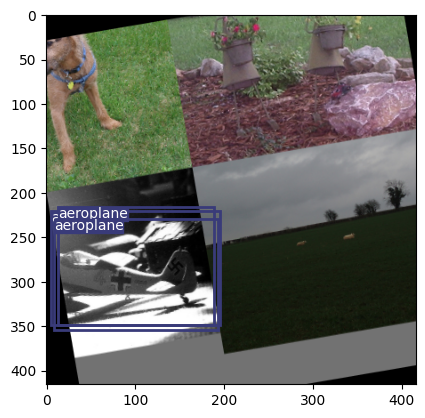

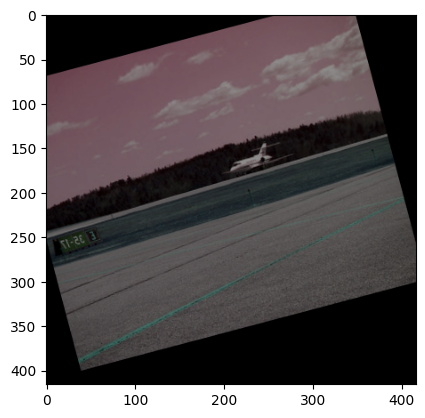

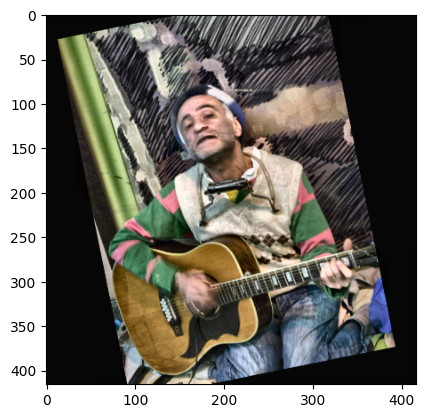

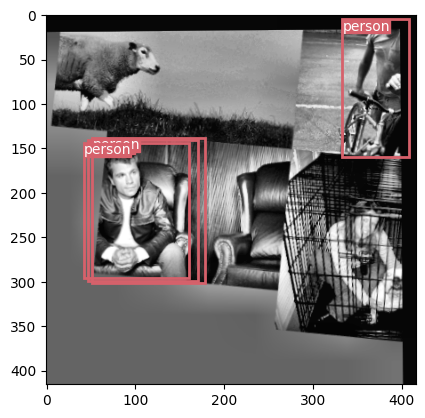

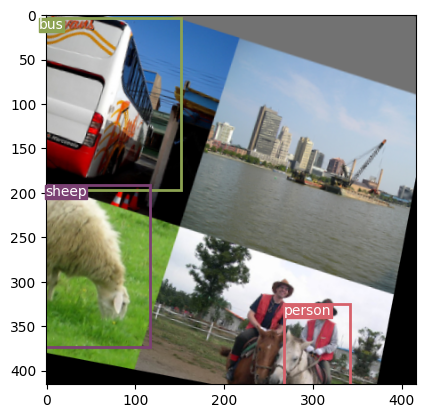

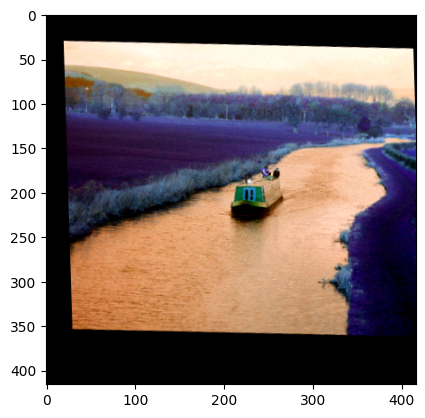

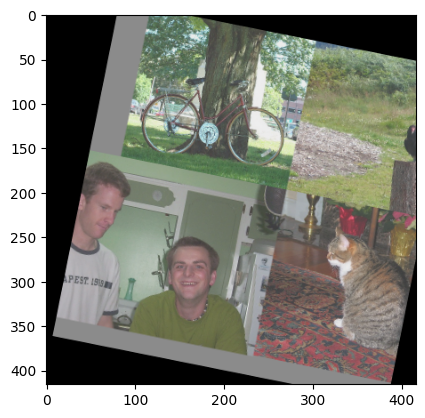

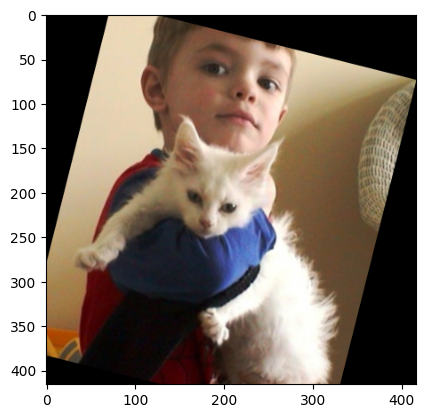

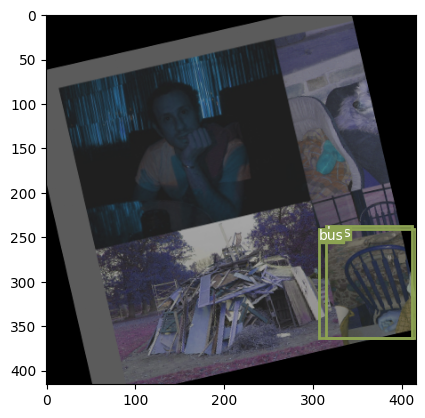

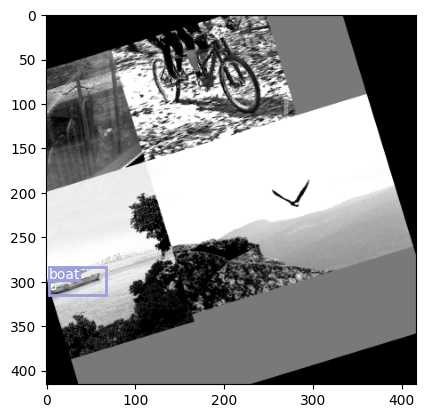

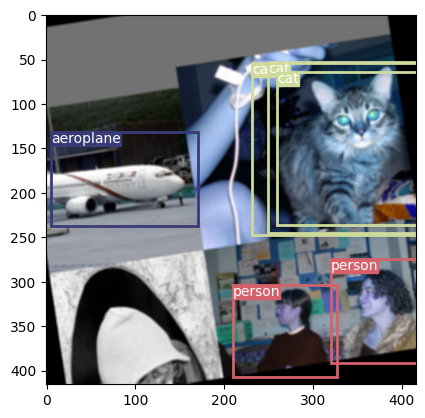

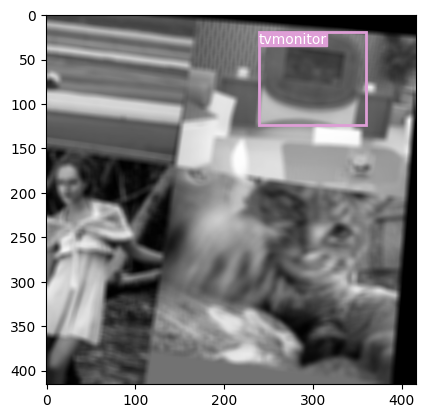

In [ ]:
plot_couple_examples(model, train_loader, 0.8, 0.9, torch.Tensor(config.SCALED_ANCHORS).to('cuda'))

In [ ]:
check_class_accuracy(model.to('cuda'), test_loader, threshold=0.05)

100%|██████████| 78/78 [02:00<00:00,  1.55s/it]

Class accuracy is: 76.143936%
No obj accuracy is: 97.994751%
Obj accuracy is: 59.830105%


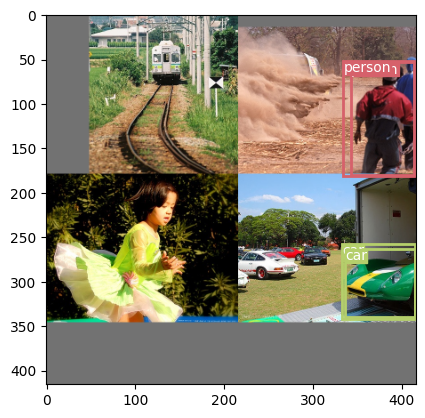

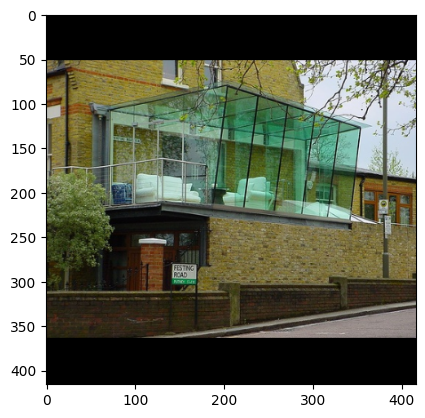

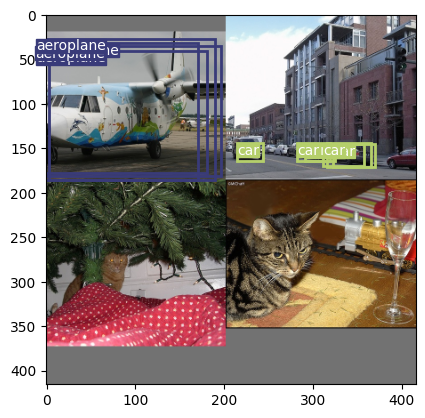

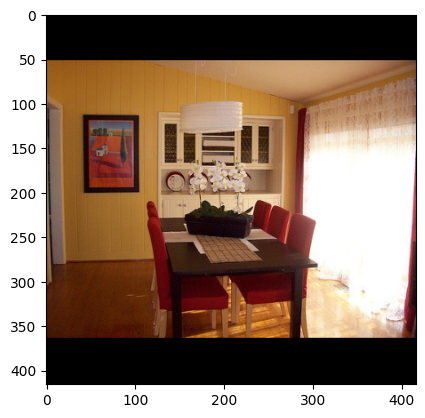

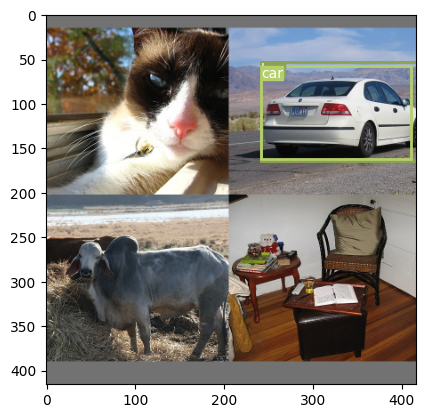

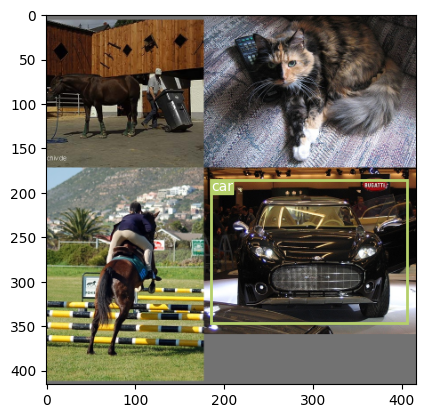

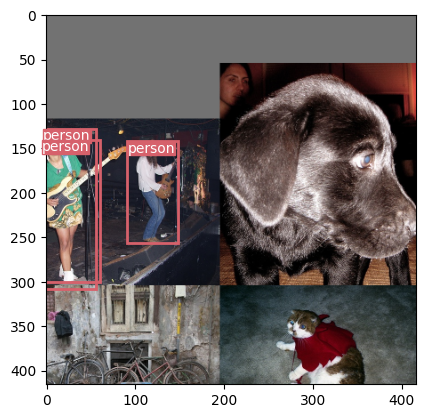

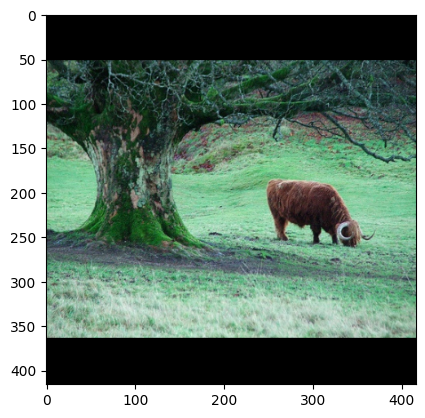

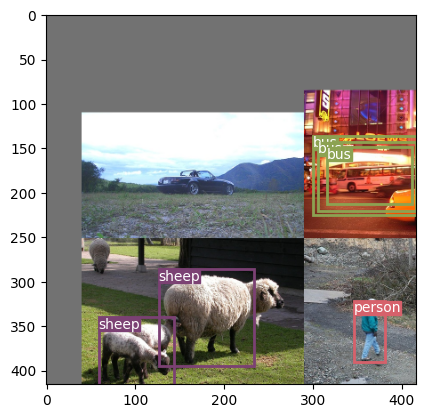

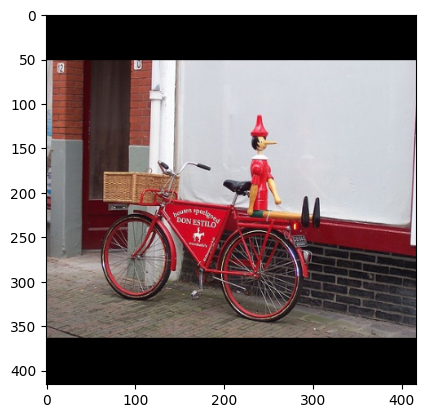

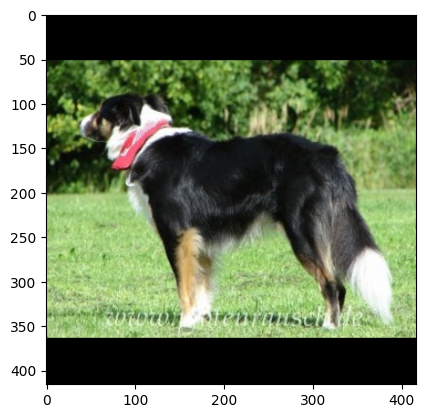

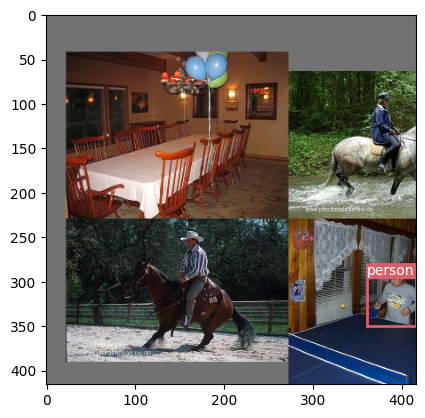

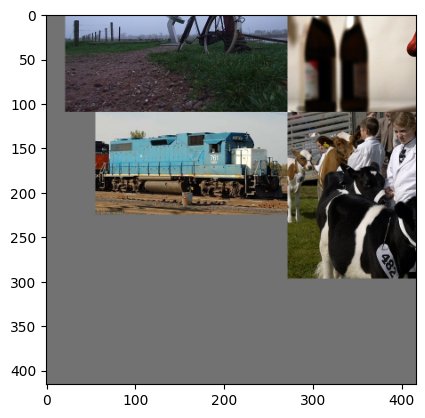

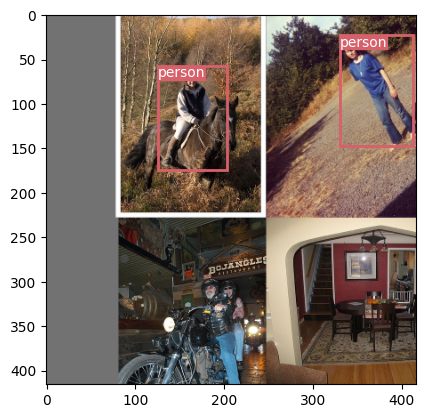

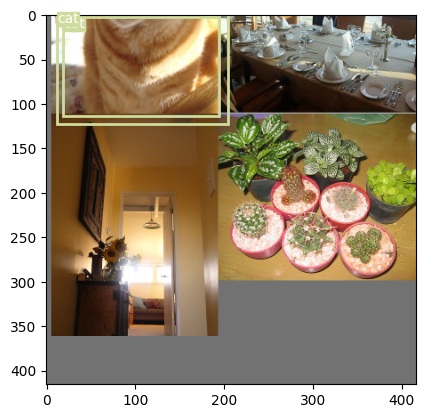

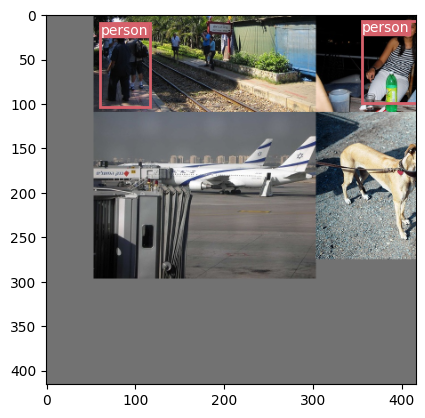

In [ ]:
plot_couple_examples(model, test_loader, 0.8, 0.9, torch.Tensor(config.SCALED_ANCHORS).to('cuda'))